                 Name   2025      2026      2027      2028     2029  Total_WAR
0         Aaron Judge  9.100  8.758750  8.417500  8.076250  7.73500  42.087500
4    Gunnar Henderson  6.400  6.160000  5.920000  5.680000  5.44000  29.600000
1      Bobby Witt Jr.  6.100  5.871250  5.642500  5.413750  5.18500  28.212500
3       Shohei Ohtani  5.875  5.654688  5.434375  5.214062  4.99375  27.171875
33  William Contreras  5.600  5.390000  5.180000  4.970000  4.76000  25.900000
5           Juan Soto  5.380  5.178250  4.976500  4.774750  4.57300  24.882500
6     Freddie Freeman  5.280  5.082000  4.884000  4.686000  4.48800  24.420000
19       Jose Ramirez  5.160  4.966500  4.773000  4.579500  4.38600  23.865000
32    Julio Rodriguez  5.100  4.908750  4.717500  4.526250  4.33500  23.587500
7        Mookie Betts  5.020  4.831750  4.643500  4.455250  4.26700  23.217500


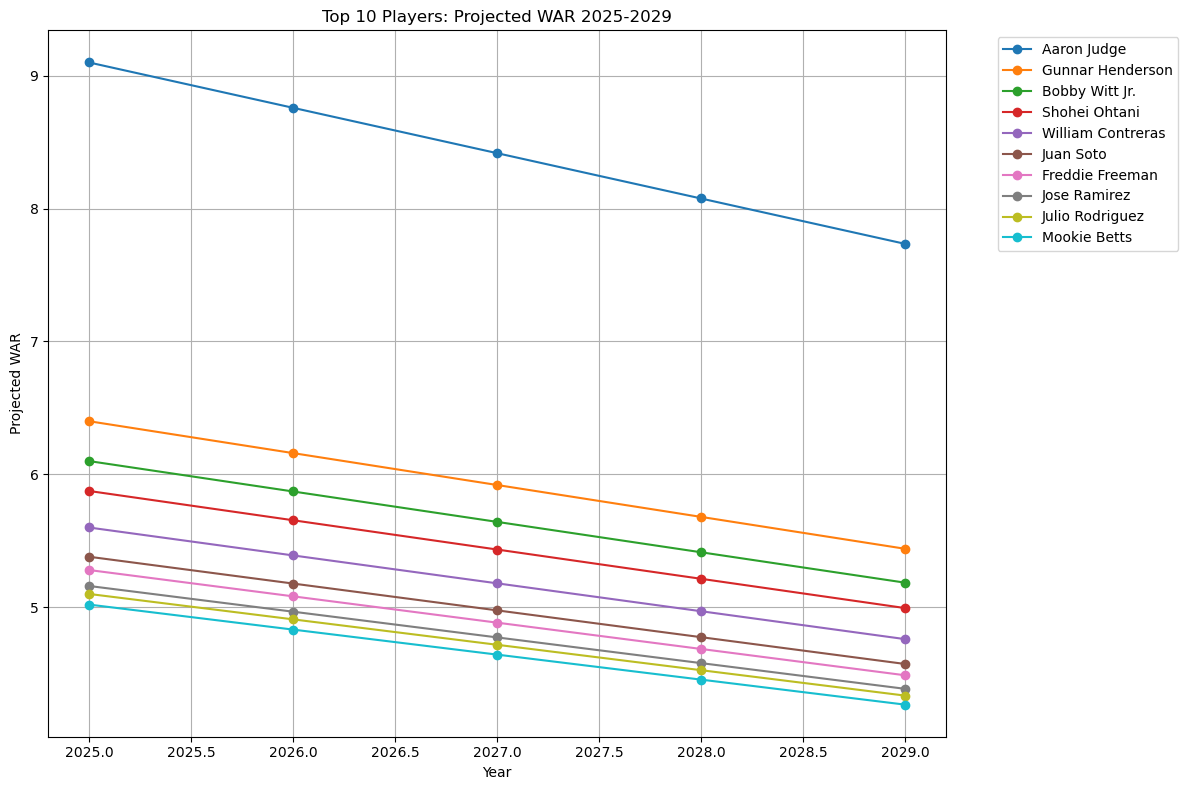

,Name,2025,2026,2027,2028,2029,Total_WAR
0,Aaron Judge,9.100,8.758750,8.417500,8.076250,7.73500,42.087500
4,Gunnar Henderson,6.400,6.160000,5.920000,5.680000,5.44000,29.600000
1,Bobby Witt Jr.,6.100,5.871250,5.642500,5.413750,5.18500,28.212500
3,Shohei Ohtani,5.875,5.654688,5.434375,5.214062,4.99375,27.171875
33,William Contreras,5.600,5.390000,5.180000,4.970000,4.76000,25.900000
5,Juan Soto,5.380,5.178250,4.976500,4.774750,4.57300,24.882500
6,Freddie Freeman,5.280,5.082000,4.884000,4.686000,4.48800,24.420000
19,Jose Ramirez,5.160,4.966500,4.773000,4.579500,4.38600,23.865000
32,Julio Rodriguez,5.100,4.908750,4.717500,4.526250,4.33500,23.587500
7,Mookie Betts,5.020,4.831750,4.643500,4.455250,4.26700,23.217500


In [12]:
import pandas as pd
import numpy as np
from pybaseball import batting_stats
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

players_war = batting_stats(2020, 2024)

def project_war(player_war_data):
    X = player_war_data[['SLG', 'OPS']].values 
    y = player_war_data['WAR'].values  
    
    model = LinearRegression().fit(X, y) 
    
    slg_mean = player_war_data['SLG'].mean()
    ops_mean = player_war_data['OPS'].mean()
    
    future_stats = np.tile([slg_mean, ops_mean], (5, 1))
    projected_war = model.predict(future_stats)
    
    aging_curve = np.linspace(1, 0.85, 5)
    projected_war = projected_war * aging_curve
    
    return dict(zip(range(2025, 2030), projected_war))

war_projections = []
for playerid in players_war['IDfg'].unique():
    player_data = players_war[players_war['IDfg'] == playerid]
    if len(player_data) >= 2:  
        projected = project_war(player_data)
        war_projections.append({
            'playerid': playerid,
            'Name': player_data['Name'].iloc[0],
            **projected
        })

war_projections_df = pd.DataFrame(war_projections)

war_projections_df['Total_WAR'] = war_projections_df[[2025, 2026, 2027, 2028, 2029]].sum(axis=1)
top_players = war_projections_df.sort_values('Total_WAR', ascending=False).head(10)

top_players_df = top_players[['Name', 2025, 2026, 2027, 2028, 2029, 'Total_WAR']]

print(top_players_df)

plt.figure(figsize=(12, 8))
for _, player in top_players.iterrows():
    plt.plot([2025, 2026, 2027, 2028, 2029], 
             [player[2025], player[2026], player[2027], player[2028], player[2029]], 
             marker='o', label=player['Name'])

plt.xlabel('Year')
plt.ylabel('Projected WAR')
plt.title('Top 10 Players: Projected WAR 2025-2029')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(True)
plt.show()

top_players_df
